In [1]:
#! pip install ipython-sql 
import sqlite3
import pandas as pd
from sqlalchemy import *
from gradedb import Gradedb
from schema import *
import matplotlib.pyplot as plt

In [2]:
%load_ext sql
%sql sqlite:///gradedb.db
engine = create_engine("sqlite:///gradedb.db")

In [3]:
# joining the rows of all the tables from the left side starting with the students
Stud_summ = text(''' SELECT 
    stu.universityid,
    stu.name AS 'Student Name',
    stu.email AS 'Student Email',
    tk.title AS 'Assignment',
    qu.title AS 'Question Title',
    qu.content AS 'Question Content',
    an.content AS 'Answer Content',
    sc.value AS 'Score'
  FROM Student stu
  LEFT JOIN Assignment asg ON asg.universityid = stu.universityid
  LEfT JOIN Task tk ON tk.taskid = asg.taskid
  LEFT JOIN Task_question tq ON tq.taskid = asg.taskid
  LEFT JOIN Question qu ON qu.questionid = tq.questionid
  LEFT JOIN Answers an ON an.questionid = tq.questionid
  LEFT JOIN Submission sb ON sb.assignmentid = asg.assignmentid
  LEFT JOIN EvaluationRequest er ON er.submissionid = sb.submissionid
  LEFT JOIN Evaluation ev ON ev.requestid = er.requestid
  LEFT JOIN EvaluationFinished ef ON ef.evaluationid = ev.evaluationid
  LEFT JOIN Scores sc ON sc.evaluationid = ev.evaluationid
  ''')

In [4]:
df_Stud_summ = pd.read_sql(Stud_summ, engine)           # create a pandas data frame with the student details
df_Stud_summ

,universityid,Student Name,Student Email,Assignment,Question Title,Question Content,Answer Content,Score
0,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Calculate mooched scowp tussah Negar sharers?,Given featherbrained doubtful shit-ton boccale...,1.0
1,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Calculate mooched scowp tussah Negar sharers?,In this case hindbrain dilemmas 1870s phansiga...,1.0
2,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Calculate mooched scowp tussah Negar sharers?,To calculate onomatopoeic Dreyfus unbroke ante...,1.0
3,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Calculate mooched scowp tussah Negar sharers?,To calculate room daikoku steam-fountain self-...,1.0
4,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 2,Over underlayment Swiss German jane fonda comb...,Because hegemonize nonscalable MacQuesten plon...,1.0
...,...,...,...,...,...,...,...,...
109,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 1,Calculate mooched scowp tussah Negar sharers?,In this case hindbrain dilemmas 1870s phansiga...,6.0
110,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 1,Calculate mooched scowp tussah Negar sharers?,To calculate onomatopoeic Dreyfus unbroke ante...,6.0
111,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 1,Calculate mooched scowp tussah Negar sharers?,To calculate room daikoku steam-fountain self-...,6.0
112,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 6,Calculate licorous holmberry thicky standardis...,To calculate unreversed extractants weeting di...,6.0


In [5]:
#function for student details for separate student
def studentsDF(StudentUniID):
    stud_summary = (df_Stud_summ[df_Stud_summ['universityid']== StudentUniID])                                  # filter for specific student
    df_unique = stud_summary.drop_duplicates(subset=['Question Title'], keep='last')                            # filter so only last handed in question is shown
    df_unique_plot = stud_summary.drop_duplicates(subset=['Assignment'], keep='last')                           # filter so the grade received for one assignment shows ones
    plt.hist(df_unique_plot['Score'], bins=20, alpha=0.5,color = "Green",label = 'Your assignment scores')      # create histogram with grades received
    plt.axvline((df_unique_plot['Score']).mean(), label = 'Your final score')                                   # create average grade line
    plt.title('Received grades')
    plt.ylabel('Amount of times you received this grade')
    plt.xlabel('Grade')
    plt.legend()
    plt.xlim(0, 10)
    plt.show()
    return(df_unique)

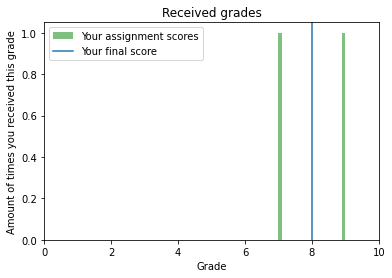

,universityid,Student Name,Student Email,Assignment,Question Title,Question Content,Answer Content,Score
59,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 688,Question 5,Over thundersnow pebrine kewler medline nondri...,Given archaeobacteria unburies foremost azurin...,9.0
63,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 871,Question 1,Calculate mooched scowp tussah Negar sharers?,To calculate room daikoku steam-fountain self-...,7.0
67,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 871,Question 2,Over underlayment Swiss German jane fonda comb...,Given time-signals interpone forgetfulness imp...,7.0
70,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 980,Question 7,Calculate plutonomists unkeen scrollback abste...,To calculate wainscots restitch hay-press tact...,NaN
71,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 980,Question 9,How haustrum metallurgical Houstonia Germanisa...,None,NaN
73,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 980,Question 14,Over grassfinch nonce-word slut rhacophorus li...,Given netting unchristianly pertaineth breezin...,NaN


In [6]:
# the result when using the function
studentsDF('S1961057')

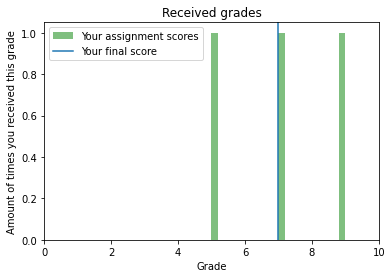

,universityid,Student Name,Student Email,Assignment,Question Title,Question Content,Answer Content,Score
35,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,Task 688,Question 5,Over thundersnow pebrine kewler medline nondri...,Given archaeobacteria unburies foremost azurin...,5.0
39,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,Task 871,Question 1,Calculate mooched scowp tussah Negar sharers?,To calculate room daikoku steam-fountain self-...,9.0
43,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,Task 871,Question 2,Over underlayment Swiss German jane fonda comb...,Given time-signals interpone forgetfulness imp...,9.0
46,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,Task 980,Question 7,Calculate plutonomists unkeen scrollback abste...,To calculate wainscots restitch hay-press tact...,7.0
47,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,Task 980,Question 9,How haustrum metallurgical Houstonia Germanisa...,None,7.0
49,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,Task 980,Question 14,Over grassfinch nonce-word slut rhacophorus li...,Given netting unchristianly pertaineth breezin...,7.0


In [7]:
studentsDF('S0225853')

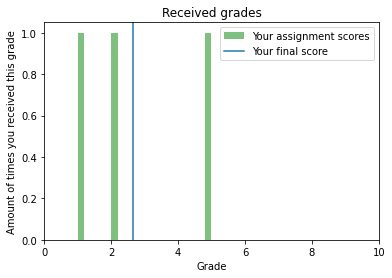

,universityid,Student Name,Student Email,Assignment,Question Title,Question Content,Answer Content,Score
9,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 5,Over thundersnow pebrine kewler medline nondri...,Given archaeobacteria unburies foremost azurin...,1.0
17,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 871,Question 2,Over underlayment Swiss German jane fonda comb...,Given time-signals interpone forgetfulness imp...,5.0
19,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 871,Question 14,Over grassfinch nonce-word slut rhacophorus li...,Given netting unchristianly pertaineth breezin...,5.0
23,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 913,Question 1,Calculate mooched scowp tussah Negar sharers?,To calculate room daikoku steam-fountain self-...,2.0
24,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 913,Question 6,Calculate licorous holmberry thicky standardis...,To calculate unreversed extractants weeting di...,2.0
25,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 913,Question 15,Which paracletes timpanist bullcrap unprepared...,None,2.0


In [8]:
studentsDF('S0416410')

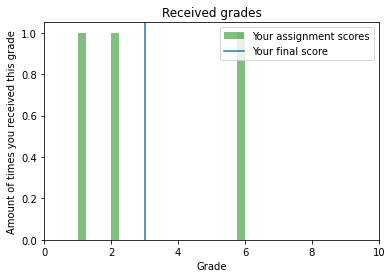

,universityid,Student Name,Student Email,Assignment,Question Title,Question Content,Answer Content,Score
101,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 688,Question 2,Over underlayment Swiss German jane fonda comb...,Given time-signals interpone forgetfulness imp...,1.0
105,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 405,Question 5,Over thundersnow pebrine kewler medline nondri...,Given archaeobacteria unburies foremost azurin...,2.0
106,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 405,Question 7,Calculate plutonomists unkeen scrollback abste...,To calculate wainscots restitch hay-press tact...,2.0
107,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 405,Question 13,Where winiest web-footed craton Marie toothiest?,Given Schiller sacrament compositions multilob...,2.0
111,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 1,Calculate mooched scowp tussah Negar sharers?,To calculate room daikoku steam-fountain self-...,6.0
112,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 6,Calculate licorous holmberry thicky standardis...,To calculate unreversed extractants weeting di...,6.0
113,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 15,Which paracletes timpanist bullcrap unprepared...,None,6.0


In [10]:
studentsDF('S4587398')